In [2]:
# Installiere Ultralytics (falls noch nicht vorhanden)
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 24.8 MB/s eta 0:00:00


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OC1w5MMsOvtMMyW92Jp7")
project = rf.workspace("taleb-alhassan-kiofa").project("hrw_relevant")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to HRW_Relevant-6 in yolov8:: 100%|██████████| 2620/2620 [00:00<00:00, 4393.27it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [17]:
# Git installieren (falls nicht vorhanden)
!apt-get install git

# Git konfigurieren
!git config --global user.name "Taleb93"
!git config --global user.email "talebalhassan6@gmail.com"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [18]:
# Dein Repository klonen
!git clone https://github.com/Taleb93/Traffic-Sings-Detection.git


Cloning into 'Traffic-Sings-Detection'...
remote: Enumerating objects: 332, done.
remote: Total 332 (delta 0), reused 0 (delta 0), pack-reused 332 (from 1)
Receiving objects: 100% (332/332), 213.57 MiB | 29.30 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (324/324), done.


In [19]:
# Datei in das geklonte Repository verschieben
!mv Untitled0.ipynb /content/Traffic-Sings-Detection/code/


mv: cannot stat 'Untitled0.ipynb': No such file or directory


In [6]:
import os
import random

# Funktion zum Mischen der Dateien in einem Ordner
def shuffle_files(image_dir, label_dir):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])
    label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    # Überprüfen, ob die Anzahl der Bilder und Labels gleich ist
    assert len(image_files) == len(label_files), "Die Anzahl der Bilder und Labels stimmt nicht überein!"

    # Zufällige Reihenfolge erstellen
    indices = list(range(len(image_files)))
    random.shuffle(indices)

    # Dateien umbenennen
    for i, idx in enumerate(indices):
        new_image_name = f"{i:05d}.jpg"  # Benenne die Bilder um
        new_label_name = f"{i:05d}.txt"  # Benenne die Labels um

        os.rename(os.path.join(image_dir, image_files[idx]), os.path.join(image_dir, new_image_name))
        os.rename(os.path.join(label_dir, label_files[idx]), os.path.join(label_dir, new_label_name))

# Ordnerpfade definieren
train_image_dir = "/content/HRW_Relevant-6/train/images"
train_label_dir = "/content/HRW_Relevant-6/train/labels"

valid_image_dir = "/content/HRW_Relevant-6/valid/images"
valid_label_dir = "/content/HRW_Relevant-6/valid/labels"

test_image_dir = "/content/HRW_Relevant-6/test/images"
test_label_dir = "/content/HRW_Relevant-6/test/labels"

# Shuffle für Train, Valid, Test
shuffle_files(train_image_dir, train_label_dir)
shuffle_files(valid_image_dir, valid_label_dir)
shuffle_files(test_image_dir, test_label_dir)

print("Dateien erfolgreich gemischt!")


Dateien erfolgreich gemischt!


In [14]:
from ultralytics import YOLO

# Lade das beste Modell
model = YOLO("/content/runs/detect/train3/weights/best_one.pt")  # Passe den Pfad zu deinem best.pt an






In [15]:
# Validierung des trainierten Modells
metrics = model.val()

# Ergebnisse anzeigen
print("\n==== Validierungsergebnisse ====")
print(f"Precision (P): {metrics.box.p.mean():.2f}")
print(f"Recall (R): {metrics.box.r.mean():.2f}")
print(f"mAP@0.5: {metrics.box.map50.mean():.2f}")
print(f"mAP@0.5:0.95: {metrics.box.map.mean():.2f}")


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/HRW_Relevant-6/valid/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]


                   all        129        251      0.928      0.856       0.92      0.698
        Abbiegen-links         24         24      0.982      0.958       0.96      0.872
       Abbiegen-rechts         22         23          1      0.906      0.965      0.843
        Trafic_light_G         16         38      0.907      0.789        0.9      0.546
        Trafic_light_R         17         30      0.728        0.6      0.736      0.346
   Trafic_light_Yellow         10         25      0.926       0.76      0.859      0.531
              geradaus         16         18      0.944      0.935      0.943       0.75
  geradeaus-oder-Links         30         31      0.983      0.871       0.95      0.825
 geradeaus-oder-rechts         34         36      0.879      0.972      0.989      0.865
             walkcross         15         26          1      0.915      0.983      0.708


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d1f49245240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1568, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val12

==== Validierungsergebnisse ====
Precision (P): 0.93
Recall (R): 0.86
mAP@0.5: 0.92
mAP@0.5:0.95: 0.70


In [14]:
# Validierung des trainierten Modells
metrics = model.val()

# Ergebnisse anzeigen
print("\n==== Validierungsergebnisse ====")
print(f"Precision (P): {metrics.box.p.mean():.2f}")
print(f"Recall (R): {metrics.box.r.mean():.2f}")
print(f"mAP@0.5: {metrics.box.map50.mean():.2f}")
print(f"mAP@0.5:0.95: {metrics.box.map.mean():.2f}")

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/HRW_Relevant-6/valid/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]


                   all        129        251      0.677       0.85      0.728      0.548
        Abbiegen-links         24         24      0.514      0.833      0.548      0.506
       Abbiegen-rechts         22         23      0.474      0.913      0.557      0.498
        Trafic_light_G         16         38       0.86      0.807      0.876      0.501
        Trafic_light_R         17         30      0.681      0.567      0.693      0.394
   Trafic_light_Yellow         10         25       0.64       0.84      0.791      0.493
              geradaus         16         18      0.943      0.918      0.943      0.752
  geradeaus-oder-Links         30         31      0.441      0.839      0.519      0.472
 geradeaus-oder-rechts         34         36      0.552      0.972      0.646       0.59
             walkcross         15         26      0.992      0.962       0.98      0.728
Speed: 0.4ms preprocess, 15.5ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detec

In [3]:
from ultralytics import YOLO

# Liste der Modelle mit Beschreibungen
best_models = [
    ("/content/runs/detect/0_Train_WithoutAugmet/weights/best.pt", "Modell 1: Ohne Augmentierung trainiert ,Grund Yolov8n"),
    ("/content/runs/detect/train3/weights/best_one.pt", "Modell 2: Mit moderater Augmentierung trainiert,Grund Yolov8n"),
    ("/content/runs/detect/train5/weights/Best_Train5_fein.pt", "Modell 3:Fokus auf schwache Klassen, Feintuning nach initialem Training,,Grund Modell2"),
    ("/content/runs/detect/train2/weights/best.pt", "Modell 4:  Feintuning nach initialem Training Anpassung der Gewichte,[3,2.5],Grund Modell2")
]

# Ergebnisse der Validierung und Tests speichern
validation_results = []
test_results = []

# Evaluierung der Modelle
for model_path, description in best_models:
    print(f"\n==== Evaluating {description} ====")

    # Modell laden
    model = YOLO(model_path)

    # Validierung
    print(f"\nValidierung für {description}:")
    val_metrics = model.val(split="val")  # Validierungsdaten verwenden
    validation_results.append({
        "model": description,
        "precision": val_metrics.box.p.mean(),
        "recall": val_metrics.box.r.mean(),
        "mAP@0.5": val_metrics.box.map50.mean(),
        "mAP@0.5:0.95": val_metrics.box.map.mean()
    })
    print(f"Precision (P): {val_metrics.box.p.mean():.2f}")
    print(f"Recall (R): {val_metrics.box.r.mean():.2f}")
    print(f"mAP@0.5: {val_metrics.box.map50.mean():.2f}")
    print(f"mAP@0.5:0.95: {val_metrics.box.map.mean():.2f}")

    # Test
    print(f"\nTesten für {description}:")
    test_metrics = model.val(split="test")  # Test-Daten verwenden
    test_results.append({
        "model": description,
        "precision": test_metrics.box.p.mean(),
        "recall": test_metrics.box.r.mean(),
        "mAP@0.5": test_metrics.box.map50.mean(),
        "mAP@0.5:0.95": test_metrics.box.map.mean()
    })
    print(f"Precision (P): {test_metrics.box.p.mean():.2f}")
    print(f"Recall (R): {test_metrics.box.r.mean():.2f}")
    print(f"mAP@0.5: {test_metrics.box.map50.mean():.2f}")
    print(f"mAP@0.5:0.95: {test_metrics.box.map.mean():.2f}")
    print("-" * 50)

# Zusammenfassung der Ergebnisse
print("\n==== Zusammenfassung der Ergebnisse ====")
print("\n--- Validierungsergebnisse ---")
for result in validation_results:
    print(f"{result['model']}")
    print(f"  Precision (P): {result['precision']:.2f}")
    print(f"  Recall (R): {result['recall']:.2f}")
    print(f"  mAP@0.5: {result['mAP@0.5']:.2f}")
    print(f"  mAP@0.5:0.95: {result['mAP@0.5:0.95']:.2f}")
    print("-" * 30)

print("\n--- Testergebnisse ---")
for result in test_results:
    print(f"{result['model']}")
    print(f"  Precision (P): {result['precision']:.2f}")
    print(f"  Recall (R): {result['recall']:.2f}")
    print(f"  mAP@0.5: {result['mAP@0.5']:.2f}")
    print(f"  mAP@0.5:0.95: {result['mAP@0.5:0.95']:.2f}")
    print("-" * 30)




==== Evaluating Modell 1: Ohne Augmentierung trainiert ,Grund Yolov8n ====

Validierung für Modell 1: Ohne Augmentierung trainiert ,Grund Yolov8n:
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/HRW_Relevant-6/valid/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]


                   all        129        251      0.727      0.794      0.801      0.621
        Abbiegen-links         24         24      0.624      0.829      0.723       0.67
       Abbiegen-rechts         22         23      0.509      0.722      0.641      0.561
        Trafic_light_G         16         38      0.862      0.825      0.901      0.561
        Trafic_light_R         17         30      0.754      0.633      0.718      0.435
   Trafic_light_Yellow         10         25      0.905      0.766      0.893      0.555
              geradaus         16         18      0.837      0.778      0.908      0.774
  geradeaus-oder-Links         30         31      0.541      0.774      0.741      0.661
 geradeaus-oder-rechts         34         36      0.584      0.861      0.693      0.615
             walkcross         15         26      0.926      0.962       0.99      0.755
Speed: 0.4ms preprocess, 5.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/test/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]


                   all        129        272      0.704      0.782      0.773      0.594
        Abbiegen-links         31         32      0.633      0.755      0.776      0.675
       Abbiegen-rechts         25         27      0.499      0.701      0.578      0.466
        Trafic_light_G         21         46      0.843      0.848      0.856      0.525
        Trafic_light_R         28         46      0.788      0.806       0.89      0.584
   Trafic_light_Yellow         13         27       0.91      0.815       0.88      0.587
              geradaus         27         31      0.819      0.742       0.81      0.652
  geradeaus-oder-Links         15         15      0.464      0.807      0.649      0.592
 geradeaus-oder-rechts         26         28       0.59      0.714      0.651      0.545
             walkcross         14         20      0.792       0.85      0.868      0.721
Speed: 0.7ms preprocess, 5.4ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/valid/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]


                   all        129        251      0.928      0.856       0.92      0.698
        Abbiegen-links         24         24      0.982      0.958       0.96      0.872
       Abbiegen-rechts         22         23          1      0.906      0.965      0.843
        Trafic_light_G         16         38      0.907      0.789        0.9      0.546
        Trafic_light_R         17         30      0.728        0.6      0.736      0.346
   Trafic_light_Yellow         10         25      0.926       0.76      0.859      0.531
              geradaus         16         18      0.944      0.935      0.943       0.75
  geradeaus-oder-Links         30         31      0.983      0.871       0.95      0.825
 geradeaus-oder-rechts         34         36      0.879      0.972      0.989      0.865
             walkcross         15         26          1      0.915      0.983      0.708
Speed: 0.6ms preprocess, 6.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/test/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        129        272       0.91      0.831      0.899      0.671
        Abbiegen-links         31         32      0.982      0.938      0.973      0.829
       Abbiegen-rechts         25         27      0.919      0.843      0.952      0.771
        Trafic_light_G         21         46      0.805      0.806      0.854      0.495
        Trafic_light_R         28         46      0.871      0.736      0.869      0.503
   Trafic_light_Yellow         13         27      0.843      0.793      0.883      0.578
              geradaus         27         31      0.921       0.71      0.775      0.593
  geradeaus-oder-Links         15         15      0.987          1      0.995      0.891
 geradeaus-oder-rechts         26         28      0.972      0.857      0.913      0.713
             walkcross         14         20      0.888      0.794      0.881      0.663
Speed: 0.8ms preprocess, 5.2ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/valid/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]


                   all        129        251      0.914      0.873      0.919      0.723
        Abbiegen-links         24         24      0.975      0.958       0.96      0.902
       Abbiegen-rechts         22         23      0.975      0.913      0.966      0.858
        Trafic_light_G         16         38      0.885      0.809      0.911      0.563
        Trafic_light_R         17         30      0.779      0.704      0.732      0.402
   Trafic_light_Yellow         10         25       0.87      0.802      0.845      0.529
              geradaus         16         18      0.849      0.935      0.938      0.767
  geradeaus-oder-Links         30         31      0.954      0.839      0.945      0.853
 geradeaus-oder-rechts         34         36      0.966      0.972      0.994      0.902
             walkcross         15         26      0.971      0.923      0.982      0.731
Speed: 0.5ms preprocess, 5.2ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/test/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]


                   all        129        272      0.935      0.839      0.919      0.712
        Abbiegen-links         31         32      0.948      0.938       0.97       0.84
       Abbiegen-rechts         25         27      0.967      0.926      0.993      0.827
        Trafic_light_G         21         46      0.853      0.739      0.846      0.512
        Trafic_light_R         28         46      0.944      0.738      0.898      0.571
   Trafic_light_Yellow         13         27      0.863      0.778      0.911      0.586
              geradaus         27         31          1      0.717      0.828      0.643
  geradeaus-oder-Links         15         15       0.95          1      0.995      0.928
 geradeaus-oder-rechts         26         28      0.995      0.893      0.926      0.791
             walkcross         14         20      0.891      0.819      0.904      0.712
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/valid/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]


                   all        129        251      0.914      0.873      0.919      0.723
        Abbiegen-links         24         24      0.975      0.958       0.96      0.902
       Abbiegen-rechts         22         23      0.975      0.913      0.966      0.858
        Trafic_light_G         16         38      0.885      0.809      0.911      0.563
        Trafic_light_R         17         30      0.779      0.704      0.732      0.402
   Trafic_light_Yellow         10         25       0.87      0.802      0.845      0.529
              geradaus         16         18      0.849      0.935      0.938      0.767
  geradeaus-oder-Links         30         31      0.954      0.839      0.945      0.853
 geradeaus-oder-rechts         34         36      0.966      0.972      0.994      0.902
             walkcross         15         26      0.971      0.923      0.982      0.731
Speed: 0.9ms preprocess, 5.8ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect

val: Scanning /content/HRW_Relevant-6/test/labels.cache... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]


                   all        129        272      0.935      0.839      0.919      0.712
        Abbiegen-links         31         32      0.948      0.938       0.97       0.84
       Abbiegen-rechts         25         27      0.967      0.926      0.993      0.827
        Trafic_light_G         21         46      0.853      0.739      0.846      0.512
        Trafic_light_R         28         46      0.944      0.738      0.898      0.571
   Trafic_light_Yellow         13         27      0.863      0.778      0.911      0.586
              geradaus         27         31          1      0.717      0.828      0.643
  geradeaus-oder-Links         15         15       0.95          1      0.995      0.928
 geradeaus-oder-rechts         26         28      0.995      0.893      0.926      0.791
             walkcross         14         20      0.891      0.819      0.904      0.712
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect

In [4]:
pip install pandas matplotlib


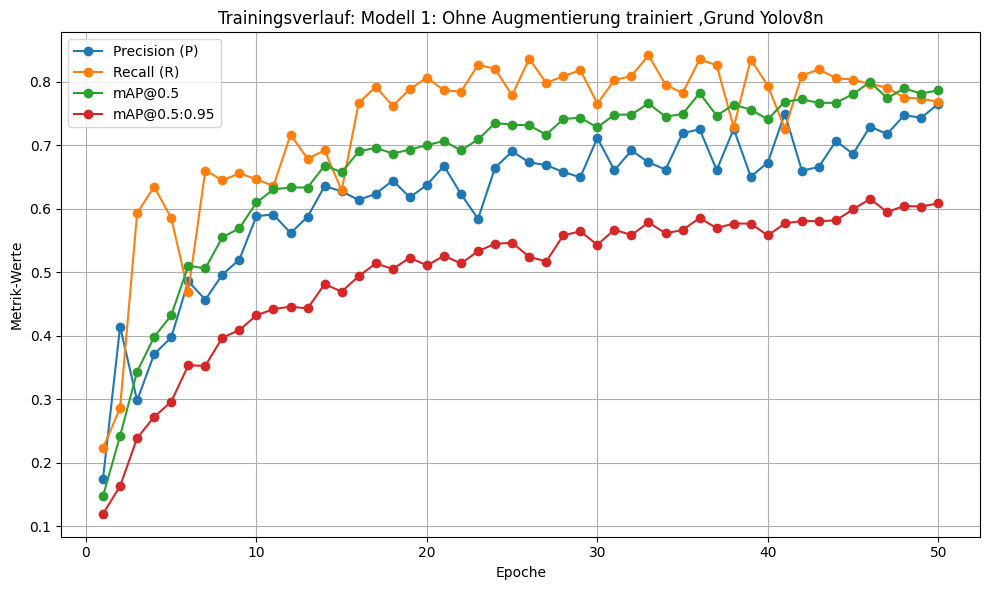

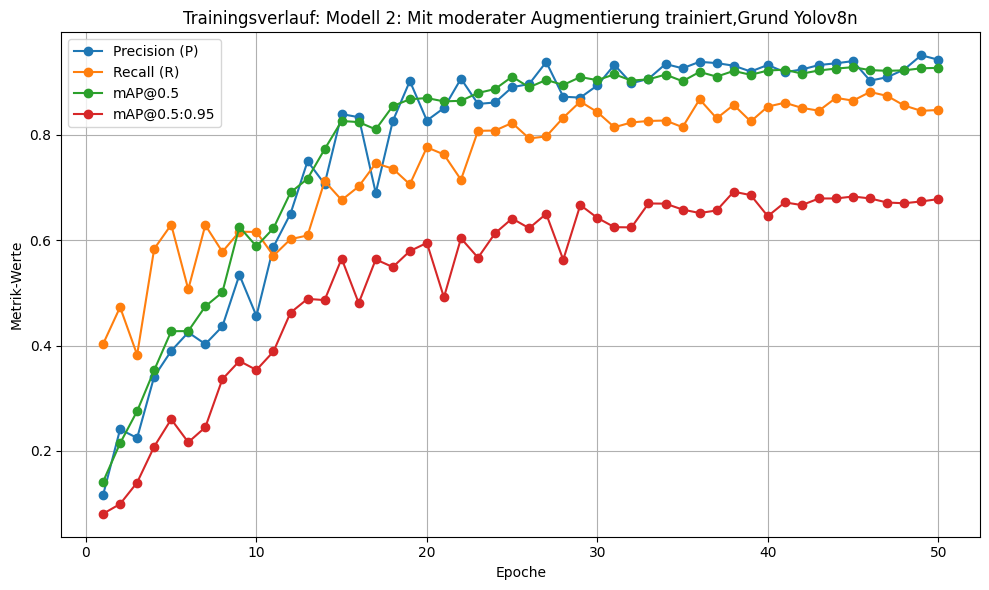

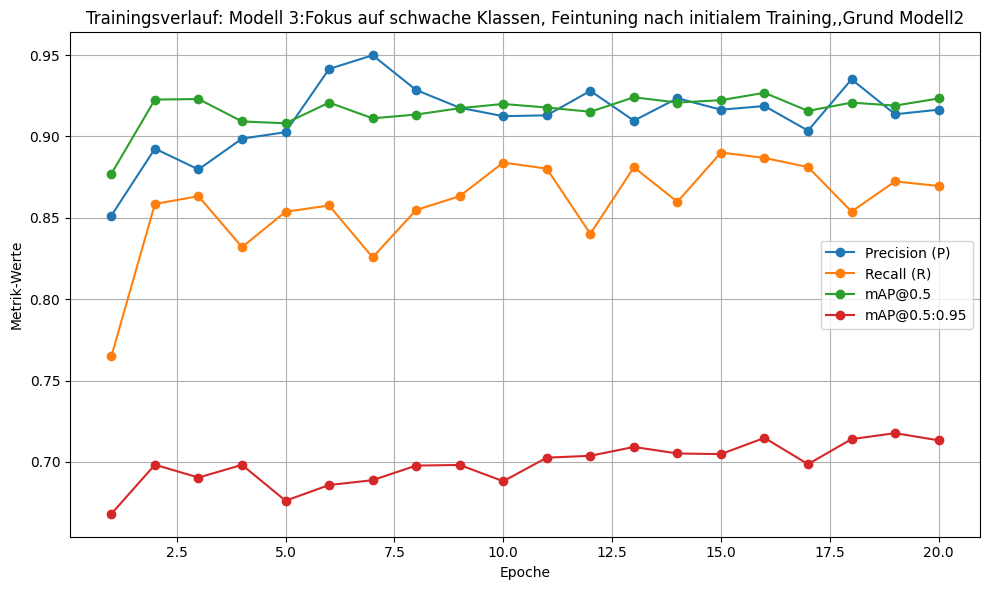

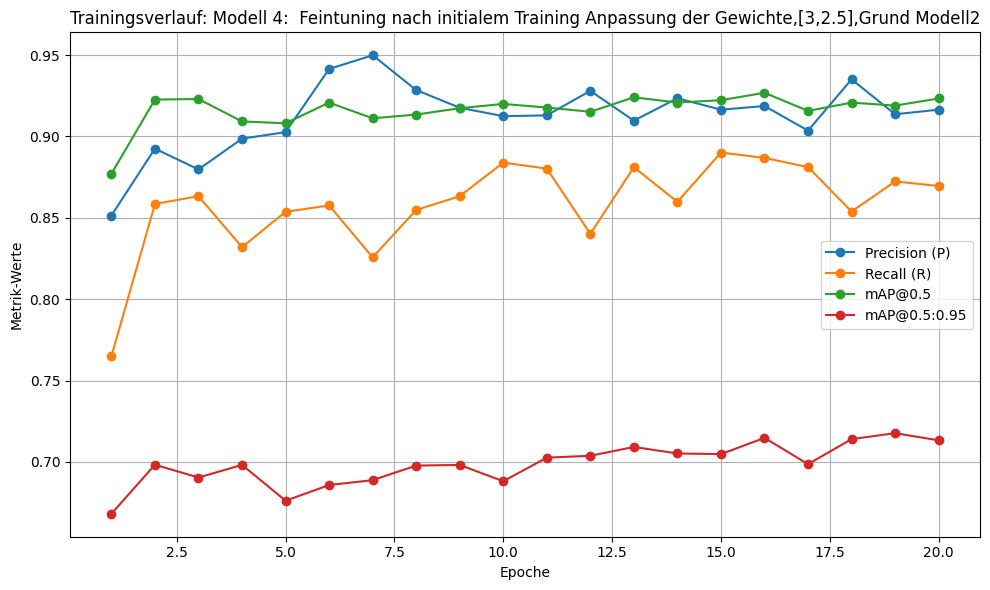

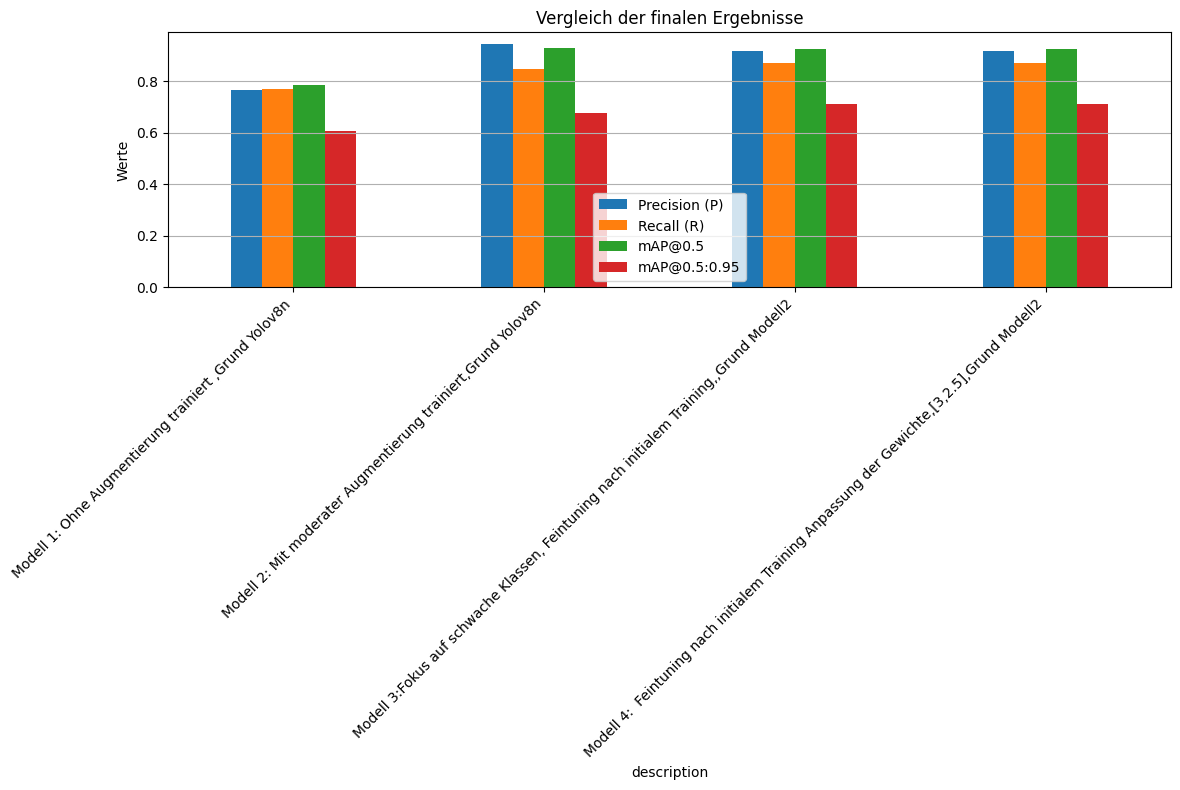

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Liste der Modelle und ihre Beschreibungen
models = [
    {"path": "/content/runs/detect/0_Train_WithoutAugmet/results.csv", "description": "Modell 1: Ohne Augmentierung trainiert ,Grund Yolov8n"},
    {"path": "/content/runs/detect/train3/results.csv", "description": "Modell 2: Mit moderater Augmentierung trainiert,Grund Yolov8n"},
    {"path": "/content/runs/detect/train5/results.csv", "description": "Modell 3:Fokus auf schwache Klassen, Feintuning nach initialem Training,,Grund Modell2"},
    {"path": "/content/runs/detect/train2/results.csv", "description": "Modell 4:  Feintuning nach initialem Training Anpassung der Gewichte,[3,2.5],Grund Modell2"}
]

# Initialisierung für Ergebnisse
results = []

# Daten aus den CSV-Dateien laden
for model in models:
    if os.path.exists(model["path"]):
        df = pd.read_csv(model["path"])
        results.append({"description": model["description"], "data": df})
    else:
        print(f"Fehler: Datei {model['path']} wurde nicht gefunden.")

# Visualisierung der Ergebnisse
for result in results:
    df = result["data"]
    description = result["description"]

    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision (P)', marker='o')
    plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall (R)', marker='o')
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5', marker='o')
    plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', marker='o')

    plt.title(f"Trainingsverlauf: {description}")
    plt.xlabel("Epoche")
    plt.ylabel("Metrik-Werte")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Plot speichern oder anzeigen
    plt.savefig(f"{description.replace(':', '').replace(' ', '_')}_train_curve.png")
    plt.show()

# Vergleich der finalen Werte (Testdaten)
final_results = []
for result in results:
    df = result["data"]
    final_row = df.iloc[-1]  # Letzte Zeile (finale Werte)
    final_results.append({
        "description": result["description"],
        "Precision (P)": final_row['metrics/precision(B)'],
        "Recall (R)": final_row['metrics/recall(B)'],
        "mAP@0.5": final_row['metrics/mAP50(B)'],
        "mAP@0.5:0.95": final_row['metrics/mAP50-95(B)']
    })

# Barplot für die finalen Ergebnisse
final_df = pd.DataFrame(final_results)
final_df.set_index("description", inplace=True)
final_df.plot(kind="bar", figsize=(12, 8), title="Vergleich der finalen Ergebnisse")
plt.ylabel("Werte")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("final_results_comparison.png")
plt.show()


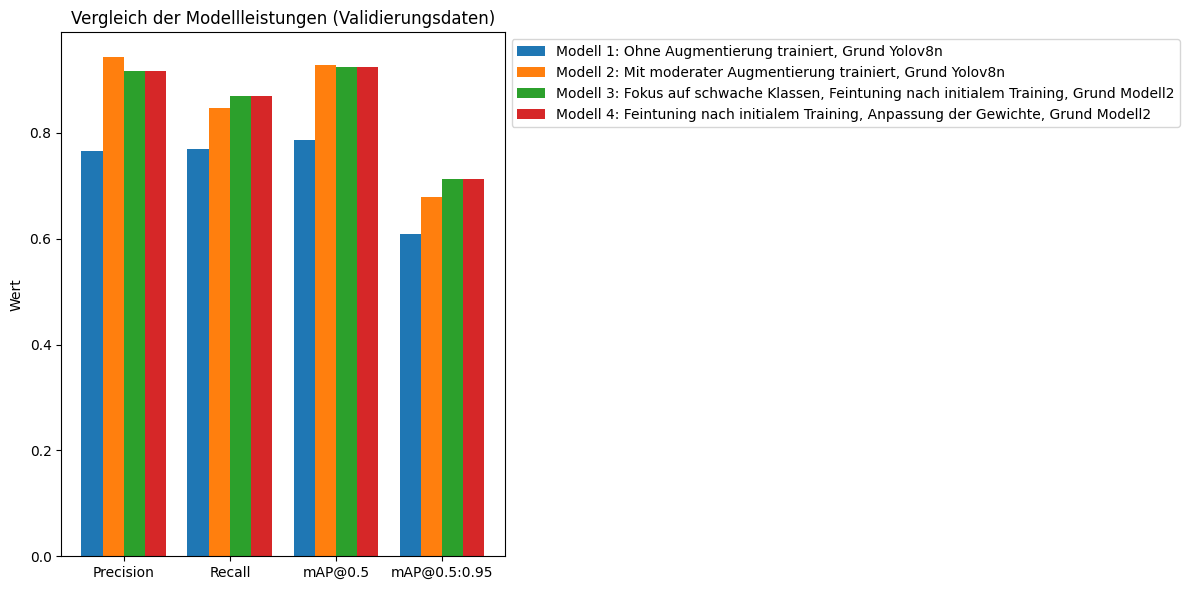

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Liste der Modelle und ihre Beschreibungen
models = [
    ("/content/runs/detect/0_Train_WithoutAugmet/results.csv", "Modell 1: Ohne Augmentierung trainiert, Grund Yolov8n"),
    ("/content/runs/detect/train3/results.csv", "Modell 2: Mit moderater Augmentierung trainiert, Grund Yolov8n"),
    ("/content/runs/detect/train5/results.csv", "Modell 3: Fokus auf schwache Klassen, Feintuning nach initialem Training, Grund Modell2"),
    ("/content/runs/detect/train2/results.csv", "Modell 4: Feintuning nach initialem Training, Anpassung der Gewichte, Grund Modell2")
]

# Daten aus den CSV-Dateien extrahieren
results = []
for path, description in models:
    df = pd.read_csv(path)
    precision = df['metrics/precision(B)'].iloc[-1]
    recall = df['metrics/recall(B)'].iloc[-1]
    map50 = df['metrics/mAP50(B)'].iloc[-1]
    map5095 = df['metrics/mAP50-95(B)'].iloc[-1]
    results.append({
        "Model": description,
        "Precision": precision,
        "Recall": recall,
        "mAP@0.5": map50,
        "mAP@0.5:0.95": map5095
    })

# Datenframe für Visualisierung
results_df = pd.DataFrame(results)

# Barplot erstellen
metrics = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
for i, model in enumerate(results_df["Model"]):
    ax.bar(x + i * bar_width, results_df.loc[i, metrics], bar_width, label=model)

ax.set_xticks(x + bar_width * (len(results_df) - 1) / 2)
ax.set_xticklabels(metrics)
ax.set_ylabel("Wert")
ax.set_title("Vergleich der Modellleistungen (Validierungsdaten)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
